Bolded text = **do not change**

Italics text = *replace with your own words*


******************
*******************

# **Description of data**

The data I chose is the insurance data. The variables include "age" "sex" "bmi" "children" "smoker" "region" and "charges".

I plan to train a binary model on the feature that best fit the target variable. 
Also, I plan to train a linear regression model on the feature that best fit the target variable.

In the other words, the goal is finding out the best predictor for target variable and showing how that model perform.


*******************
*******************
# **Libraries**

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from collections import ChainMap

*******************
*******************
# **Functions used in notebook**

*If you write a function to help with any of your sections, please put that function here*

In [300]:
def smoker_data(data):
    data2 = data.copy()
    data2["smoker"] = np.where(data2["smoker"]==1, data2["smoker"], np.nan)
    data2 = data2.dropna(subset = ["smoker"])
    data2 = data2.drop(columns = ["smoker"])
    return data2

def best_model_selection(X,y,data):
    
    data = data.dropna(subset = [X])
    data = data.dropna(subset = [y])
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(data[[X]], data[y], random_state = 1)
    
    test_score_list = []
    
    tree_model = tree.DecisionTreeClassifier(max_depth = 1)
    tree_model = tree_model.fit(Xtrain, ytrain)
    tree_train_score = tree_model.score(Xtrain, ytrain)
    tree_test_score = tree_model.score(Xtest, ytest)
    test_score_list.append(tree_test_score)
    
    logit_model = LogisticRegression(fit_intercept = True, random_state = 1)
    logit_model = logit_model.fit(Xtrain, ytrain)
    logit_train_score = logit_model.score(Xtrain, ytrain)
    logit_test_score = logit_model.score(Xtest, ytest)
    test_score_list.append(logit_test_score)

    if (tree_test_score == max(test_score_list)): #and (tree_train_score > tree_test_score):
        out = {("tree_model_"+str(X)):tree_test_score}
        
    elif (logit_test_score == max(test_score_list)): #and (logit_train_score > logit_test_score):
        out = {"logit_model":logit_test_score}
        
    else:
        out = print(test_score_list)
    
    return out

def find_best_binary(y, data):

    selection = []
    selection_dict = {}
    
    
    for feature in data.columns:
        if feature != y:
            selection.append(best_model_selection(feature, y, data))
    
    selection_dict = dict(ChainMap(*selection))
   
    best_score = max(selection_dict.values())
    best_feature = list(selection_dict.keys())[list(selection_dict.values()).index(best_score)]
    best_feature = best_feature.split("_")
    best_feature_dict = {"feature" : best_feature[-1], "model" : best_feature[0]}
    
    X = best_feature_dict["feature"]
    data = data.dropna(subset = [X])
    data = data.dropna(subset = [y])
    Xtrain, Xtest, ytrain, ytest = train_test_split(data[[X]], data[y], random_state = 1)
    
    if best_feature_dict["model"] == "tree":
        
        tree_model = tree.DecisionTreeClassifier(max_depth = 1)
        tree_model = tree_model.fit(Xtrain, ytrain)
        tree_predicted = tree_model.predict(Xtest)
        fpr, tpr, threshholds = metrics.roc_curve(ytest, tree_predicted)
        tree_train_score = round(tree_model.score(Xtrain, ytrain),4)
        tree_test_score = round(tree_model.score(Xtest, ytest),4)
        
        print("Best Predictor: " + X)
        print(data[feature].describe())
        print("----------")
        print("Binary Classification: Decision Tree    Score(training): " + str(tree_train_score) + 
              "    Score(testing): " + str(tree_test_score) + "    F1 score: " + str(round(metrics.f1_score(ytest, tree_predicted),4)))
        
        fig, axis = plt.subplots(1,2, figsize = [10,10])
        axis[0].set_xlabel("false positive rate")
        axis[0].set_ylabel("true positive rate")
        axis[0].plot([0,1],[0,1], color = "g", linestyle = "--")
        axis[0].plot(fpr, tpr, label = "ROC curve")
        axis[0].legend()
        sns.boxplot(data[y],data[X], ax = axis[1])
        plt.tight_layout()
        
    elif best_feature_dict["model"] == "logit":
        
        logit_model = LogisticRegression(fit_intercept = True, random_state = 1)
        logit_model = logit_model.fit(Xtrain, ytrain)
        logit_predicted = logit_model.predict(Xtest)
        logit_train_score = round(logit_model.score(Xtrain, ytrain),4)
        logit_test_score = round(logit_model.score(Xtest, ytest),4)
        
        print("Best Predictor: " + X)
        print(data[feature].describe())
        print("----------")
        print("Binary Classification: Logistic Model    Score(training): " + str(logit_train_score) + 
              "    Score(testing): " + str(logit_test_score) + "    F1 score: " + str(round(metrics.f1_score(ytest, logit_predicted),4)))
        
        fig, axis = plt.subplots(1,2, figsize = [10,10])
        sns.scotterplot(Xtest["children"], ytest, ax=axis[0])
        sns.lineplot(Xtest["children"], logit_model.predict_proba(Xtest)[:,0], ax=axis[0])
        sns.boxplot(data[y],data[X], ax = axis[1])
        plt.tight_layout()

def linear_model_data(X,y):
    X = X.dropna(subset = [y])
    predictors = X.drop(columns = [y])
    #creating empty list to find best R^2
    dist_list = []
    # using for loop to identify which feature is the best predictor
    for feature in predictors.columns:

        predictors = predictors.dropna(subset = [feature])
        X = X.dropna(subset = [feature])
        y_target = X[y]
        Xtrain, Xtest, ytrain, ytest = train_test_split(X[[feature]],y_target,random_state=1)
        model = LinearRegression()
        model.fit(Xtrain, ytrain)
        #calculating R^2 for each feature
        Rsq = model.score(Xtrain,ytrain)
        # calculating the disctance between 1 and R^2 
        Rsq_dist = abs(1-Rsq)
        dist_list.append(Rsq_dist)
        
    # now we know which is the best
    best_feature = predictors.columns[dist_list.index(min(dist_list))]
    # getting training and testing data for that predictor
    Xtrain, Xtest, ytrain, ytest = train_test_split(X[[best_feature]],y_target,random_state=1)
    model = LinearRegression()
    model.fit(Xtrain, ytrain)
    y_model = model.predict(Xtest)
    print("Best predictor for " + y + " is " + best_feature + ".")
    print(X[best_feature].describe())
    print("----------")
    print('y = ',model.coef_[0],'*x + ',model.intercept_)
    
    #starting the plotting
    fig,axes = plt.subplots(1, 2, figsize = [12,12])
    axes[0].set_ylabel(y)
    print("R^2 (Training) = "+ str(round(model.score(Xtrain,ytrain),4)))
    sns.scatterplot(Xtrain[Xtrain.columns[0]], ytrain, ax=axes[0]).set_title("Training Data")
    sns.lineplot(Xtest[Xtest.columns[0]], y_model, ax=axes[0])
    
    axes[1].set_ylabel(y)
    print("R^2 (Testing) = "+str(round(model.score(Xtest, ytest),4)))
    sns.scatterplot(Xtest[Xtest.columns[0]], ytest, ax=axes[1]).set_title("Testing Data")
    sns.lineplot(Xtest[Xtest.columns[0]], y_model, ax=axes[1])
    plt.tight_layout()
    

*******************
*******************
# **Getting data**

1. using pd.read_ to load the data.
2. using .head() method to explore first five elements
3. using .tail() method to explore last five elements
4. using .info() method to read the information of the data
5. using the .describe() method to read descriptive statistic

In [303]:
insurance = pd.read_csv("datasets-13720-18513-insurance.csv")

In [10]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [12]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


***************
***************
# **Visualizing data**

1. creating a boxplot for region and charges, and deferentiate them by sex to see the different on charges under different condition

2. creating a scatterplot for age and charges, and setting hue=sex to see what relationship might be between age and charges with different gender

3. creating a scatterplot for age and charges, but hue=smoker, in order to see why charges range split to three parts

4. creating a scatter plot for bmi and charges to see if there's a linear relationship. Setting hue=smoker, to see a clearer picture.

5. creating a scatter plot for age and charges, setting hue=bmi<30 to see how bmi affect charges accociate with age changes.

6. creating a boxplot for children and charges, setting hue=smoker, to see how number of children affect charges for smoker.

7. creating a heatmap to visualize the correlation for each numerical value

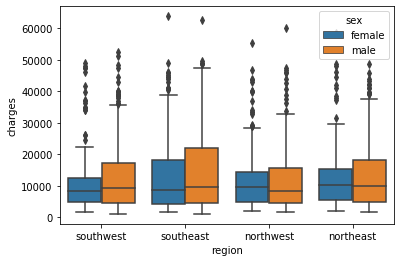

In [114]:
sns.boxplot(insurance["region"], insurance["charges"], hue = insurance["sex"])

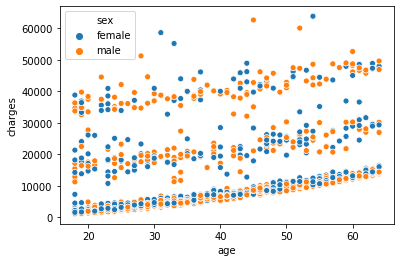

In [15]:
sns.scatterplot(insurance["age"],insurance["charges"], hue = insurance["sex"])

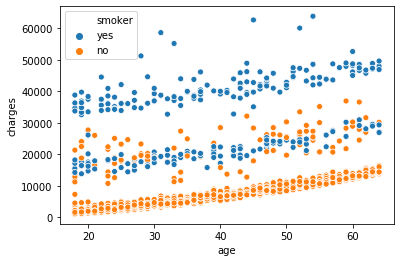

In [16]:
sns.scatterplot(insurance["age"],insurance["charges"], hue = insurance["smoker"])

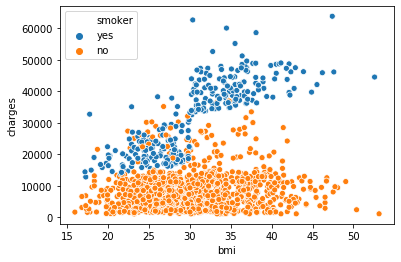

In [17]:
sns.scatterplot(insurance["bmi"],insurance["charges"], hue = insurance["smoker"])

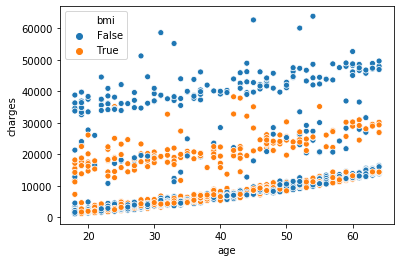

In [18]:
sns.scatterplot(insurance["age"],insurance["charges"], hue = insurance["bmi"]<30)

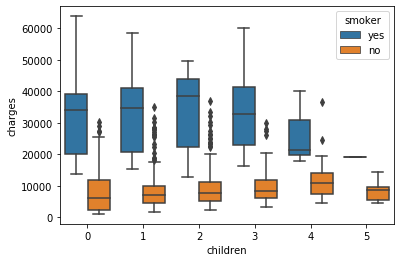

In [19]:
sns.boxplot(insurance["children"], insurance["charges"], hue = insurance["smoker"])

Text(0.5, 1, 'Correlation Between Features')

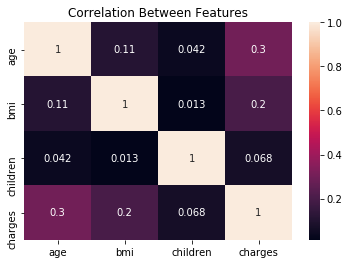

In [307]:
sns.heatmap(insurance.corr(), annot = True)
plt.title("Correlation Between Features")

***************
***************
# **Feature Engineering**

*Checking null values, Dummy coding, dealing with outlier, pulling out data for specific group of people

1. Using .isnull() to return Bool in the data. Looping all Bool and store into a list. Lastly, count for False.
2. Dummy coding for non-numerical variables, including "sex" "smoker" "region"
3. Creating a list of numerical variable. Looping over them and using IQR method to turn all the outlier to NaN
4. Creating a function smoker_data to turn all smoker==0 to NaN, and drop all of those rows and the smoker column.

In [89]:
insurance_null = insurance.isnull()

is_null = []
for column in insurance_null.columns:
    for status in list(insurance_null[column]):
        if status == True:
            is_null.append("True")
        else:
            is_null.append("False")

counter = 0
for i in is_null:
    if i == True:
        counter+=1
        
print(counter)

0


In [225]:
insurance["sex"] = np.where(insurance["sex"]=="male", 1, 0)

insurance["smoker"] = np.where(insurance["smoker"]=="yes", 1, 0)

insurance["region"] = np.where(insurance["region"]=="southeast",1, insurance["region"])
insurance["region"] = np.where(insurance["region"]=="northeast",1, insurance["region"])
insurance["region"] = np.where(insurance["region"]==1,1, 0)

In [226]:
not_dummy_list = ["age","bmi","children","charges"]
for feature in not_dummy_list:
    Q1 = insurance[feature].quantile(0.25)
    Q3 = insurance[feature].quantile(0.75)
    IQR = Q3-Q1
    index = (insurance[feature] > (Q1 - 1.5 * IQR)) & (insurance[feature ]< (Q1 + 1.5 * IQR))
    insurance[feature] = np.where(index, insurance[feature], np.nan)

In [290]:
#pull out smoker data only, so we can later analyze what happen in smoker group
smoker_data = smoker_data(insurance)

***************
***************
# **Analysis section**

### Binary Classification
1. Creating fuction "best_model_selection", taking the input of (predictor,target variable, dataset).
    Next, Selecting a best model type (Tree or Logistic) for the input predictors
    Finally return the dictionary with the key of best type of model, and the value of testing score

2. Creating fuction "find_best_binary" to find the best predictor and corresponed model type
    by looping all predictor, and storing outputs from "best_model_selection" into a list.
    Find the highest value of the key from the dictionary, and to see which predictor has highest score and the model we will use. 
    Lastly, using the selected predictor to biuld the best model and plot the visualization (ROC curve, boxplot(predictor,target))
    
### Linear Regression
1. Creating function "linear_model_data" taking input of X(dataset) and y(target variable).
    Dropping all NaN from target variable and creating another Dataframe without target column.
    Looping over the new Dataframe to avoid the target itself and to identify which feature is the best predictor.
    Dropping NaN for each variable seperatly.
    Calculating R^2 for each feature
    Calculating the disctance between 1 and R^2, and store those into a list
    Finding the index of minimun distance
    Getting training and testing data for that predictor and training the Linear model
    Plotting the both testing and training datas and best fitting line

Best Predictor: charges
count     1108.000000
mean      8478.426266
std       5296.791121
min       1121.873900
25%       4133.972250
50%       7645.541475
75%      11838.063762
max      22493.659640
Name: charges, dtype: float64
----------
Binary Classification: Decision Tree    Score(training): 0.9603    Score(testing): 0.9386    F1 score: 0.6909


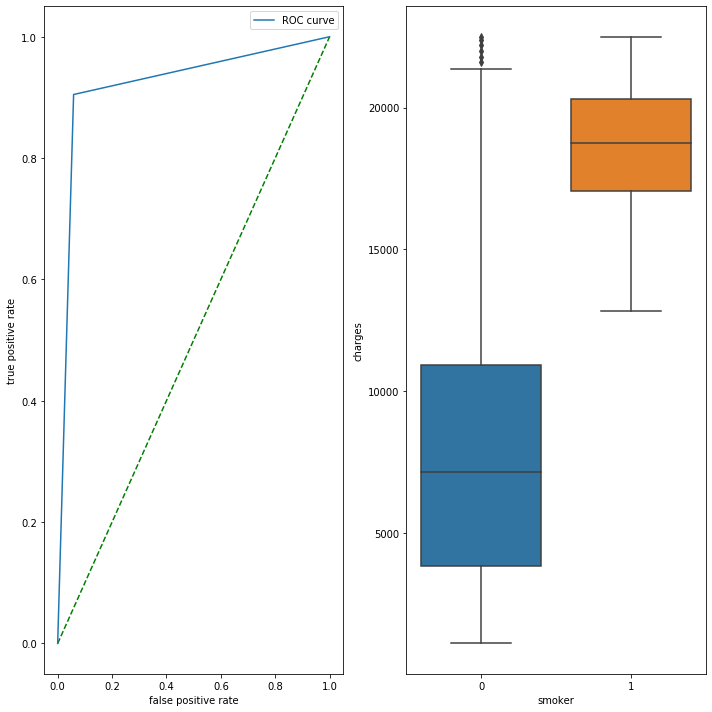

In [298]:
#machine learning 1
find_best_binary("smoker", insurance)

Best predictor for charges is smoker.
count    835.000000
mean       0.091018
std        0.287807
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: smoker, dtype: float64
----------
y =  11230.593721113586 *x +  7112.971226254834
R^2 (Training) = 0.3678
R^2 (Testing) = 0.3587


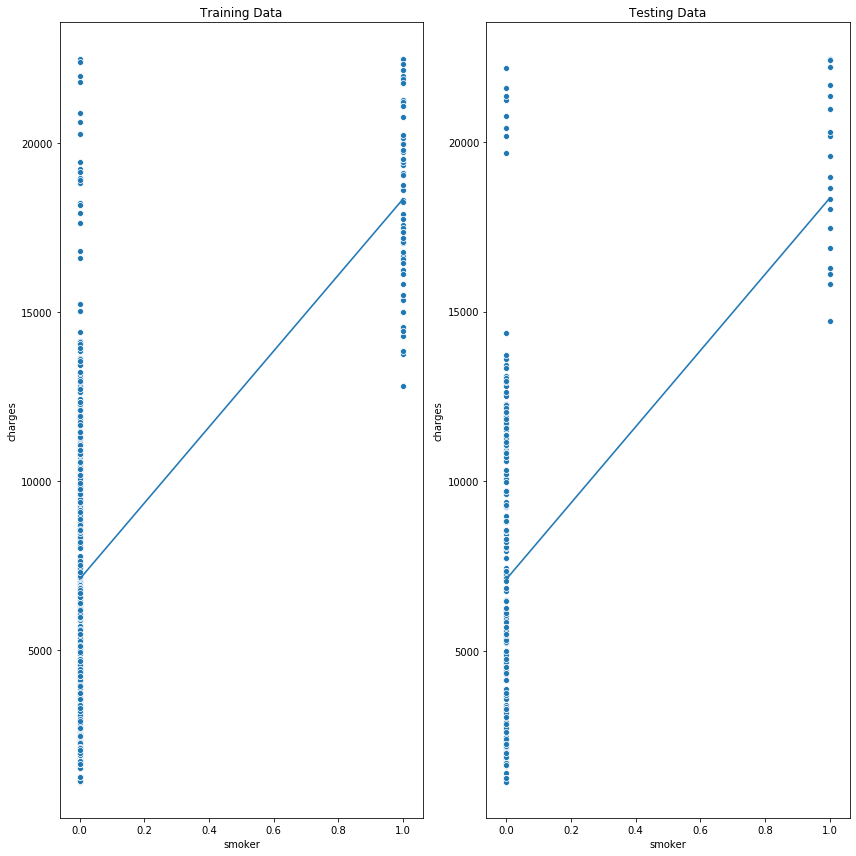

In [301]:
#machine learning 2
linear_model_data(insurance,"charges")

***************
***************
# **Conclusions**
#### Binary Classification
From this data analysis, we can see that the best predictor to identify smoker and non-smoker is charges, 
we can conclude that if charges is higher than 15000, then the individual is highly possible being a smoker. 
Charges has pretty good testing score (0.93), and fine F1 score (0.69), so charges is a strong predictor to identify if an individual is a smoker.
Bmi may be a predictor to identify an individual's gender because male has a slightly higher bmi than female in average,
but it may be not very accurate. Bmi has 0.55 testing score to predict sex, but only 0.35 for F1 score. 
Although bmi is the best to predict sex compare to all other variable, we should still be aware of its accuracy.
#### Linear Regression
Linear Regression also tells us smoker is the best predictor to predict charges, the coefficient of x(smoker) is 11230.
The model indicates that a smoker's charges will be 11230 higher than non-smoker, which reflect the binary classification for smoker and non-smoker. The R^2 for smoker as a predictor is 0.35, its not very good, but I still believe smoker is significant for charges.
The Linear model also shows the pattern for how age may affect charges, its clear to see as age increase, charges would increase respectfully.
Another thing is interesting, for original data, age is the biggest factor for bmi. However, if we pull out the data of smoker only, we can see the charges has a positive linear relationship with bmi, which means as bmi increases, charges will increase respectfully.